# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [8]:
# Your code here.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy import stats


age= [17,51,27,21,36,48,19,26,54,30]
tardies=[10,1,5,9,4,2,9,6,0,3]


student_data = pd.DataFrame({'Age': age , 'Tardies': tardies})

student_data

,Age,Tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

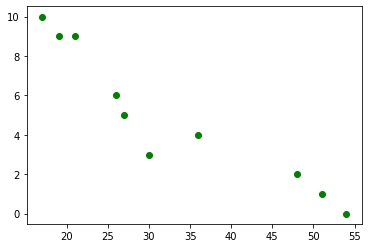

In [11]:
# Your code here.
plt.scatter(student_data['Age'], student_data['Tardies'], color = 'green')
plt.show()

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [ ]:
# Your response here. 
'''
I see a negative trend. The oldest, the less late they arrive to class.
'''

Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [15]:
# Your response here.
#correlation:
calc_corr = student_data.corr()

#covariance:
calc_cov = student_data.cov()

print(calc_corr, calc_cov)

# there is a strong negative correlation between age and tardies (-0.939) and the covariance indicates the direction of the linear correlation between the variables.

              Age   Tardies
Age      1.000000 -0.939163
Tardies -0.939163  1.000000                 Age    Tardies
Age      187.655556 -45.566667
Tardies  -45.566667  12.544444


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [19]:
# Your response here.
#define x and y
x= student_data['Age']
y = student_data['Tardies']
results = stats.linregress(x,y)
regression_line = results[0]*x + results[1]


Plot your regression model on your scatter plot.

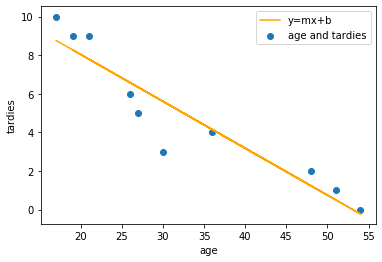

In [24]:
# Your code here.
#plot the scatter with x and y
plt.scatter(x,y,label ='age and tardies')
#plot the regression line obtained in the previous and label with linear model 
plt.plot(x, regression_line, c = 'orange', label = 'y=mx+b')
#label axes
plt.xlabel('age')
plt.ylabel('tardies')
#add this so the legend appears with the labels
plt.legend()
plt.show()

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [33]:
# Your response here. 
#get r**2 as r2
print(results)
results_array=np.array(results)
r2 = results_array[2]*results_array[2]
print(r2)

# The R squared  is 0.882 which indicates 88% of the variance in tardiness can be explained by age.

LinregressResult(slope=-0.2428207709159808, intercept=12.888803363135768, rvalue=-0.9391626886887121, pvalue=5.56665383455343e-05, stderr=0.03139728816158607)


0.8820265558250108

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [36]:
# Import any libraries you may need & the data
vehicles = pd.read_csv('vehicles.csv')
vehicles.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [41]:
# we want the correlation between each of these variables so we can do a correlation matrix
cor_matrix= vehicles[['Year','Cylinders', 'Fuel Barrels/Year','Combined MPG','Fuel Cost/Year','CO2 Emission Grams/Mile']].corr()
cor_matrix

#The variables more correlated with co2 emission are fuelbarrels/year, combined mpg, fuelcost_year. 
#The one that provides the least amount of helpful information is 'year'

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [47]:
# to build a regression model we need to know the dependent and independent variables:
#the independent (x) is the one we control:
x = vehicles[['Fuel Barrels/Year', 'Combined MPG','Fuel Cost/Year','Year','Cylinders']]

#the variable i want to predict or dependent on the independents (y):
y = vehicles['CO2 Emission Grams/Mile']

#apply multilinear regression! -> usar o truque do Pedro 
import statsmodels.api as sm
model = sm.OLS(y,x).fit()


Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [46]:
# Your response here. 
model.summary()
#we can take conclusions with confidence because the r-squared is 0.99
#for a unit increase in 'Fuel Barrels/Year', there is an increase of 19.05 units in CO2 emissions.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.999
Model:                                 OLS   Adj. R-squared (uncentered):              0.999
Method:                      Least Squares   F-statistic:                          6.092e+06
Date:                     Wed, 29 Jul 2020   Prob (F-statistic):                        0.00
Time:                             18:46:44   Log-Likelihood:                     -1.5250e+05
No. Observations:                    35952   AIC:                                  3.050e+05
Df Residuals:                        35947   BIC:                                  3.050e+05
Df Model:                                5                                                  
Covariance Type:                 nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Fuel Barrels/Year    19.8588      0.059    337.001      0.000      19.743      19.974
Combined MPG         -3.0509      0.043    -70.368      0.000      -3.136      -2.966
Fuel Cost/Year        0.0292      0.000     60.084      0.000       0.028       0.030
Year                  0.0630      0.001     74.153      0.000       0.061       0.065
Cylinders             0.8873      0.081     10.952      0.000       0.729       1.046
==============================================================================
Omnibus:                    72934.517   Durbin-Watson:                   0.757
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        287219470.909
Skew:                          16.861   Prob(JB):                         0.00
Kurtosis:                     439.575   Cond. No.                     2.54e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.54e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Challenge 2: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [88]:
# Your code here.
x= [1,3,4,6,8,9,11,14]
y=[1,2,4,4,5,7,8,13]
party = pd.DataFrame({'invited':x , 'attended':y})
party


,invited,attended
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

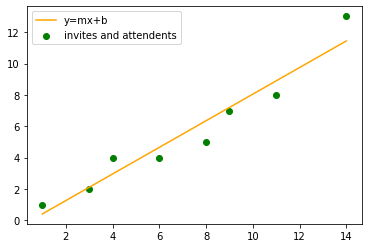

In [89]:
# Your code here.
x= party['invited']
y = party['attended']
results = stats.linregress(x,y)
regression_line = results[0]*x + results[1]

plt.scatter(x,y,color='green',label='invites and attendents')
plt.plot(x, regression_line, c = 'orange', label = 'y=mx+b')
plt.legend()
plt.show()

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [90]:
# Your response here. 
r_square= results.rvalue * results.rvalue
print(results, 'r-squared:',r_square)


LinregressResult(slope=0.8484848484848485, intercept=-0.43939393939393945, rvalue=0.9652303546573691, pvalue=0.00010236374464090686, stderr=0.09380896778286217) r-squared: 0.9316696375519905


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

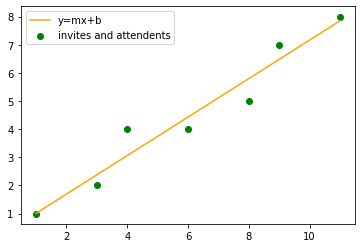

In [91]:
# Your response here. 
#the more similar to an outlier is the last one so we can drop it
party.drop(party.tail(1).index,inplace=True)

#copy everything....
x= party['invited']
y = party['attended']
results = stats.linregress(x,y)
regression_line = results[0]*x + results[1]

plt.scatter(x,y,color='green',label='invites and attendents')
plt.plot(x, regression_line, c = 'orange', label = 'y=mx+b')
plt.legend()
plt.show()



What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [93]:
# Your response here. 
results

LinregressResult(slope=0.6842105263157895, intercept=0.32330827067669166, rvalue=0.971278116825086, pvalue=0.0002644056885656864, stderr=0.07496206665031292)

In [ ]:
# with the first model we can say that for every person he invites more people attend and his teory is not right
# in the second model without the outlier we can say that for each person invited only 0.68 person attend which confirms his theory maybe.